Dataset :-> FLIGHT PRICE PREDICTION

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_excel("Data_Train (1).xlsx")

In [80]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [81]:
df1 = pd.read_excel("Test_set.xlsx")
# Merging the data set

df_final = df.merge(df1)
df_final

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,18/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:10,19:00 19 May,23h 50m,2 stops,No info,15129
1,Air India,27/06/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 28 Jun,21h 15m,2 stops,No info,10441
2,Jet Airways,21/03/2019,Delhi,Cochin,DEL → BDQ → BOM → COK,18:25,18:50 22 Mar,24h 25m,2 stops,In-flight meal not included,9270
3,IndiGo,03/03/2019,Banglore,New Delhi,BLR → DEL,18:55,21:45,2h 50m,non-stop,No info,8855
4,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,00:40,03:25,2h 45m,non-stop,No info,4777
...,...,...,...,...,...,...,...,...,...,...,...
268,Multiple carriers,6/06/2019,Delhi,Cochin,DEL → BOM → COK,10:00,21:00,11h,1 stop,No info,7933
269,Air India,24/03/2019,Banglore,New Delhi,BLR → DEL,06:10,08:55,2h 45m,non-stop,No info,3758
270,Air India,9/05/2019,Kolkata,Banglore,CCU → BOM → GOI → BLR,16:50,05:35 10 May,12h 45m,2 stops,No info,11432
271,Air India,1/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,16:40,19:15 02 Jun,26h 35m,2 stops,No info,9863


In [82]:
df_final.describe()

,Price
count,273.000000
mean,11139.970696
std,3738.853008
min,3383.000000
25%,8236.000000
50%,11542.000000
75%,13587.000000
max,31783.000000


In [83]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          273 non-null    object
 1   Date_of_Journey  273 non-null    object
 2   Source           273 non-null    object
 3   Destination      273 non-null    object
 4   Route            273 non-null    object
 5   Dep_Time         273 non-null    object
 6   Arrival_Time     273 non-null    object
 7   Duration         273 non-null    object
 8   Total_Stops      273 non-null    object
 9   Additional_Info  273 non-null    object
 10  Price            273 non-null    int64 
dtypes: int64(1), object(10)
memory usage: 23.6+ KB


In [84]:
df_final.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


Conclusion: We hav no missing values in our columns in the dataset(df_final)

In [85]:
# Feature Engineering

df_final['Date_of_Journey'] = pd.to_datetime(df_final['Date_of_Journey'])

<ipython-input-85-ce9075281dd6>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_final['Date_of_Journey'] = pd.to_datetime(df_final['Date_of_Journey'])


In [86]:
df_final['Journey_Day'] = df_final['Date_of_Journey'].dt.day
df_final['Journey_Month'] = df_final['Date_of_Journey'].dt.month
df_final['Journey_Year'] = df_final['Date_of_Journey'].dt.year

In [87]:
df_final

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,Jet Airways,2019-05-18,Delhi,Cochin,DEL → AMD → BOM → COK,19:10,19:00 19 May,23h 50m,2 stops,No info,15129,18,5,2019
1,Air India,2019-06-27,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 28 Jun,21h 15m,2 stops,No info,10441,27,6,2019
2,Jet Airways,2019-03-21,Delhi,Cochin,DEL → BDQ → BOM → COK,18:25,18:50 22 Mar,24h 25m,2 stops,In-flight meal not included,9270,21,3,2019
3,IndiGo,2019-03-03,Banglore,New Delhi,BLR → DEL,18:55,21:45,2h 50m,non-stop,No info,8855,3,3,2019
4,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,00:40,03:25,2h 45m,non-stop,No info,4777,24,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,Multiple carriers,2019-06-06,Delhi,Cochin,DEL → BOM → COK,10:00,21:00,11h,1 stop,No info,7933,6,6,2019
269,Air India,2019-03-24,Banglore,New Delhi,BLR → DEL,06:10,08:55,2h 45m,non-stop,No info,3758,24,3,2019
270,Air India,2019-05-09,Kolkata,Banglore,CCU → BOM → GOI → BLR,16:50,05:35 10 May,12h 45m,2 stops,No info,11432,9,5,2019
271,Air India,2019-06-01,Delhi,Cochin,DEL → AMD → BOM → COK,16:40,19:15 02 Jun,26h 35m,2 stops,No info,9863,1,6,2019


In [88]:
df_final[['Journey_Day','Journey_Month','Journey_Year']] = df_final[['Journey_Day','Journey_Month','Journey_Year']].astype(int)

In [89]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          273 non-null    object        
 1   Date_of_Journey  273 non-null    datetime64[ns]
 2   Source           273 non-null    object        
 3   Destination      273 non-null    object        
 4   Route            273 non-null    object        
 5   Dep_Time         273 non-null    object        
 6   Arrival_Time     273 non-null    object        
 7   Duration         273 non-null    object        
 8   Total_Stops      273 non-null    object        
 9   Additional_Info  273 non-null    object        
 10  Price            273 non-null    int64         
 11  Journey_Day      273 non-null    int64         
 12  Journey_Month    273 non-null    int64         
 13  Journey_Year     273 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(9)


In [90]:
df_final = df_final.drop('Date_of_Journey', axis = 1)

In [91]:
df_final['Arrival_Time'] = df_final['Arrival_Time'].str.split(' ').str[0]

In [92]:
df_final['Arrival_Hour'] = df_final['Arrival_Time'].str.split(':').str[0]
df_final['Arrival_min'] = df_final['Arrival_Time'].str.split(':').str[1]


In [93]:
df_final = df_final.drop('Arrival_Time', axis = 1)

In [94]:
df_final['Dep_Hour'] = df_final['Dep_Time'].str.split(':').str[0]
df_final['Dep_min'] = df_final['Dep_Time'].str.split(':').str[1]

In [95]:
df_final = df_final.drop('Dep_Time', axis = 1)

In [96]:
df_final

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,23h 50m,2 stops,No info,15129,18,5,2019,19,00,19,10
1,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,21h 15m,2 stops,No info,10441,27,6,2019,19,15,22,00
2,Jet Airways,Delhi,Cochin,DEL → BDQ → BOM → COK,24h 25m,2 stops,In-flight meal not included,9270,21,3,2019,18,50,18,25
3,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,8855,3,3,2019,21,45,18,55
4,IndiGo,Banglore,New Delhi,BLR → DEL,2h 45m,non-stop,No info,4777,24,3,2019,03,25,00,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,11h,1 stop,No info,7933,6,6,2019,21,00,10,00
269,Air India,Banglore,New Delhi,BLR → DEL,2h 45m,non-stop,No info,3758,24,3,2019,08,55,06,10
270,Air India,Kolkata,Banglore,CCU → BOM → GOI → BLR,12h 45m,2 stops,No info,11432,9,5,2019,05,35,16,50
271,Air India,Delhi,Cochin,DEL → AMD → BOM → COK,26h 35m,2 stops,No info,9863,1,6,2019,19,15,16,40


In [97]:
df_final[['Arrival_Hour','Arrival_min','Dep_Hour','Dep_min']] = df_final[['Arrival_Hour','Arrival_min','Dep_Hour','Dep_min']].astype(int)

In [98]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          273 non-null    object
 1   Source           273 non-null    object
 2   Destination      273 non-null    object
 3   Route            273 non-null    object
 4   Duration         273 non-null    object
 5   Total_Stops      273 non-null    object
 6   Additional_Info  273 non-null    object
 7   Price            273 non-null    int64 
 8   Journey_Day      273 non-null    int64 
 9   Journey_Month    273 non-null    int64 
 10  Journey_Year     273 non-null    int64 
 11  Arrival_Hour     273 non-null    int64 
 12  Arrival_min      273 non-null    int64 
 13  Dep_Hour         273 non-null    int64 
 14  Dep_min          273 non-null    int64 
dtypes: int64(8), object(7)
memory usage: 32.1+ KB


In [99]:
df_final['Total_Stops'] = df_final['Total_Stops'].str.split(" ").str[0]

In [100]:
df_final['Total_Stops']

,Total_Stops
0,2
1,2
2,2
3,non-stop
4,non-stop
...,...
268,1
269,non-stop
270,2
271,2


In [101]:
# Replace 'non-stop' with the mode of the 'Total_Stops' column
mode_value = df_final['Total_Stops'].mode()[0]  # Get the mode
df_final['Total_Stops'] = df_final['Total_Stops'].str.replace('non-stop', mode_value)

In [102]:
df_final = df_final.drop('Route', axis = 1)

In [103]:
df_final

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min
0,Jet Airways,Delhi,Cochin,23h 50m,2,No info,15129,18,5,2019,19,0,19,10
1,Air India,Delhi,Cochin,21h 15m,2,No info,10441,27,6,2019,19,15,22,0
2,Jet Airways,Delhi,Cochin,24h 25m,2,In-flight meal not included,9270,21,3,2019,18,50,18,25
3,IndiGo,Banglore,New Delhi,2h 50m,2,No info,8855,3,3,2019,21,45,18,55
4,IndiGo,Banglore,New Delhi,2h 45m,2,No info,4777,24,3,2019,3,25,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,Multiple carriers,Delhi,Cochin,11h,1,No info,7933,6,6,2019,21,0,10,0
269,Air India,Banglore,New Delhi,2h 45m,2,No info,3758,24,3,2019,8,55,6,10
270,Air India,Kolkata,Banglore,12h 45m,2,No info,11432,9,5,2019,5,35,16,50
271,Air India,Delhi,Cochin,26h 35m,2,No info,9863,1,6,2019,19,15,16,40


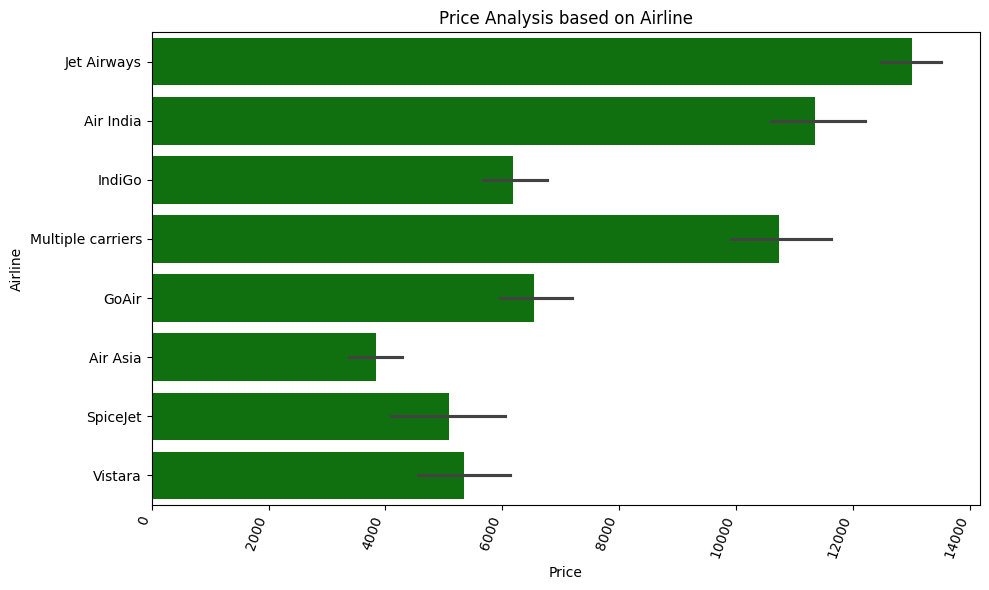

In [104]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Price', y = 'Airline',color = 'green', data = df_final)
plt.title("Price Analysis based on Airline")
plt.xlabel('Price')
plt.ylabel('Airline')
plt.xticks(rotation=70, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [105]:

# Create the interactive pie chart

import plotly.express as px

airline_counts = df_final['Airline'].value_counts()

fig = px.pie(
    values=airline_counts.values,
    names=airline_counts.index,
    title="Distribution of Airlines",
    hole=0.3
)
fig.show()
